In [16]:
# Author: iris Lin
# Date: 2026-01
# Description: Monte Carlo simulation for asset pricing and risk estimation

# Monte Carlo Simulation for Asset Price and Risk Measures

## Math of Geometric Brownian Motion(GBM)

Under the Geometric Brownian Motion assumption, the asset price admits a closed-form solution obtained by integrating the log-price SDE and applying properties of Brownian motion.

A stochastic process $S_t$ is said to follow a GBM if it satisfies the following stochastic differential equation(SDE): 

$dS_t = \mu S_t dt + \sigma S_t dW_t $

Applying Ito fomula:  
$d(ln S_t) = (ln S_t)' dS_t + \frac{1}{2} (ln S_t)'' dS_tdS_t $   
$ =\frac{dS_t}{S_t} - \frac{1}{2S_t^2}dS_tdS_t$  
$ = \frac{dS_t}{S_t} - \frac{1}{2S_t^2}\sigma ^2 S_t^2 dt $  

Plugging in $dS_t$:  
$ d(lnS_t) = \frac{\mu S_t dt + \sigma S_t d W_t}{S_t} - \frac{1}{2S_t^2}\sigma ^2 S_t^2 dt $  
$ d(lnS_t) = \mu dt + \sigma d W_t - \frac{1}{2} \sigma^2 dt $  
$ d(lnS_t) = (\mu - \frac{1}{2}\sigma ^2)dt + \sigma d W_t $

Integrate over time (from 0 to T):  
$ ln S_T - ln S_0 = (\mu - \frac{1}{2}\sigma^2)T + \sigma W_T $  
$ S_T = exp(ln S_0 + (\mu - \frac{1}{2}\sigma ^2)T + \sigma W_T) $  
$ S_T = S_0 exp( (\mu - \frac{1}{2}\sigma ^2)T + \sigma W_T) $  

Brownian motion $ W_T \sim N(0,T) $  
$W_T = \sqrt{T} Z, Z \sim N(0,1) $  

Then We can get:  
$ S_T = S_0 exp[(\mu - \frac{1}{2}\sigma ^2)T + \sigma \sqrt{T} Z] $

$ s_{t+ \Delta t} = S_t exp[(\mu - \frac{1}{2}\sigma ^2)\Delta t + \sigma \sqrt{\Delta t} Z]$

This expression enables Monte Carlo simulation by drawing independent standard normal samples to generate multiple price paths and estimate the distribution of future asset prices and risk measures such as Value at Risk (VaR).

## Code for Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
S0 = 100           # Initial stock price
mu = 0.08          # Annual expected return
sigma = 0.2        # Annual volatility
T = 1              # Time horizon (1 year)
dt = 1/252         # Daily time step
days = int(T/dt)      # Number of time steps
simulations = 1000 # Number of Monte Carlo paths
confidence_level = 0.05  # VaR confidence level

In [9]:
np.random.seed(42)
S = np.zeros((days+1, simulations))
S[0] = S0

for t in range(1, days+1):
    Z = np.random.standard_normal(simulations)
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2)*dt + sigma * np.sqrt(dt) * Z)


In [12]:
ST = S[-1]

### VaR and Conditional Value at Risk (CVaR/ES)  

$ VaR_{\alpha} = F^{-1}_X(\alpha) $

$ CVaR_{\alpha} = E[R|R \le VaR_{\alpha}]$ 

In [14]:
portfolio_returns = (ST - S0) / S0

#VaR
VaR_5 = np.percentile(portfolio_returns, confidence_level * 100)
CVaR_5 = portfolio_returns[portfolio_returns <= VaR_5].mean()

print(f"5% VaR: {VaR_5:.2%}")
print(f"5% CVaR: {CVaR_5:.2%}")

5% VaR: -23.48%
5% CVaR: -29.85%


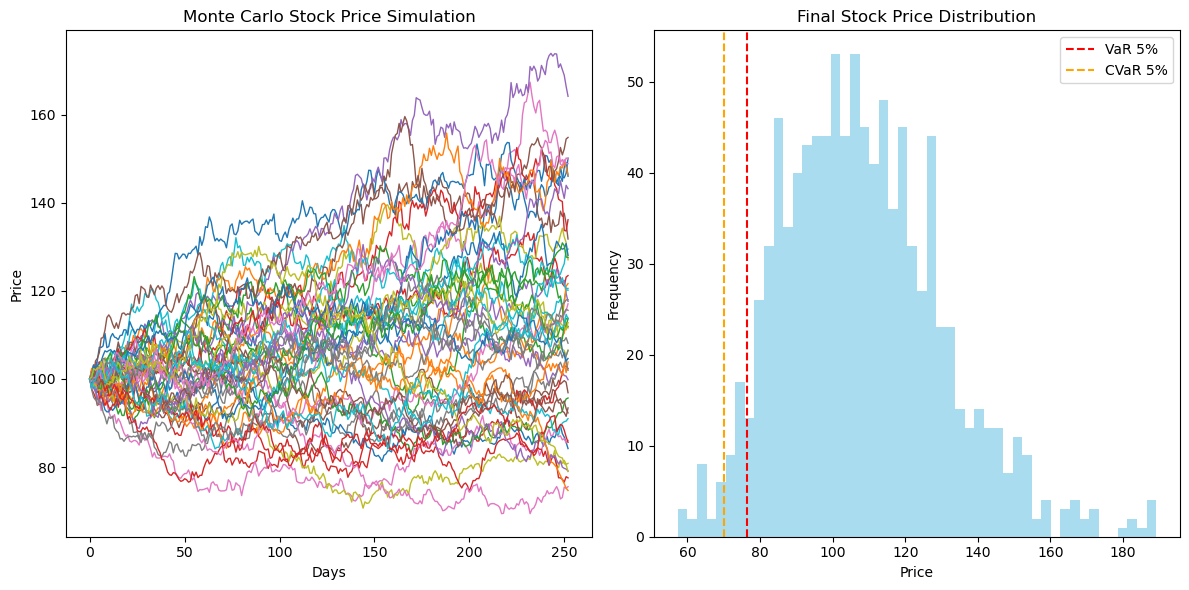

In [11]:
plt.figure(figsize=(12,6))

# path
plt.subplot(1,2,1)
plt.plot(S[:, :50], lw=1)  # 50 paths
plt.title("Monte Carlo Stock Price Simulation")
plt.xlabel("Days")
plt.ylabel("Price")

# VaRplt.subplot(1,2,2)
plt.hist(ST, bins=50, alpha=0.7, color='skyblue')
plt.axvline(S0*(1+VaR_5), color='r', linestyle='--', label=f'VaR 5%')
plt.axvline(S0*(1+CVaR_5), color='orange', linestyle='--', label=f'CVaR 5%')
plt.title("Final Stock Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()